In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

In [ ]:
!unzip data -d "images/"

In [ ]:
pip install keras_preprocessing

In [5]:
classes = os.listdir("images/Train")

In [6]:
classes

['Pikachu', 'Charmander', 'Bulbasaur']

In [16]:
for pokemon_type in classes:
   path = "images/Train/" + pokemon_type
   print(f"{pokemon_type} - {len(os.listdir(path))}")



Pikachu - 101
Charmander - 102
Bulbasaur - 101


In [19]:
from keras_preprocessing import image

In [20]:
train_data =[]
train_labels = []

In [22]:
for category in classes:
  folder = f"images/Train/{category}"
  for image_name in os.listdir(folder):
    img_path = os.path.join(folder, image_name)

    img = image.load_img(img_path, target_size=(100,100))
    img_array = image.img_to_array(img)
    train_data.append(img_array)
    train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
len(train_data)

304

In [24]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)


In [25]:
train_data = train_data.reshape(len(train_data), 30000)


In [27]:
train_data.shape

(304, 30000)

In [28]:
category2label = {"Pikachu": 0, "Charmander": 1, "Bulbasaur": 2}
label2category = {0:"Pikachu",1:"Charmander", 2:"Bulbasaur"}

In [29]:
train_labels = np.array([category2label[label] for label in train_labels])

In [30]:
from keras.utils import to_categorical

In [31]:
train_labels = to_categorical(train_labels)

In [32]:
train_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [33]:
from keras.layers import Dense
from keras import Sequential

In [35]:
features = train_data.shape[1]

In [34]:
model = Sequential()

In [39]:
model.add( Dense(units=512, activation='relu', input_shape=(features,)))

In [40]:
model.add( Dense(units=256, activation='relu'))

In [41]:
model.add( Dense(units=128, activation='relu'))

In [ ]:
model.add( Dense(units=64, activation='relu'))

In [42]:
model.add( Dense(units=3, activation='softmax'))

In [43]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15360512  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 15,787,779
Trainable params: 15,787,779
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50
10/10 [==============================] - 5s 313ms/step - loss: 10.0920 - accuracy: 0.3520
Epoch 2/50
10/10 [==============================] - 3s 297ms/step - loss: 10.7631 - accuracy: 0.3322
Epoch 3/50
10/10 [==============================] - 3s 253ms/step - loss: 10.7631 - accuracy: 0.3322
Epoch 4/50
10/10 [==============================] - 2s 249ms/step - loss: 10.7631 - accuracy: 0.3322
Epoch 5/50
10/10 [==============================] - 2s 250ms/step - loss: 10.7631 - accuracy: 0.3322
Epoch 6/50
10/10 [==============================] - 4s 368ms/step - loss: 10.7631 - accuracy: 0.3322
Epoch 7/50
10/10 [==============================] - 3s 253ms/step - loss: 10.7631 - accuracy: 0.3322
Epoch 8/50
10/10 [==============================] - 2s 248ms/step - loss: 10.7631 - accuracy: 0.3322
Epoch 9/50
10/10 [==============================] - 3s 252ms/step - loss: 10.7631 - accuracy: 0.3322
Epoch 10/50
10/10 [==============================] - 3s 256ms/step - loss: 10.7631 - accura

In [61]:
test_image = "/content/Pikachu.webp"
img = image.load_img(test_image, target_size=(100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

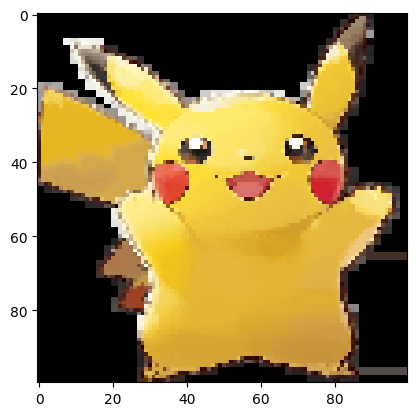

In [62]:
plt.imshow(img.astype('int'))

In [63]:
img = img.reshape(1, 30000)

In [64]:
model.predict(img).argmax()

1/1 [==============================] - 0s 44ms/step


2

In [65]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 77ms/step


'Bulbasaur'